# 3주차 과제 : Covid-19 데이터 다루기

### 1. 주어진 데이터로 그래프를 완성해 주세요. 첫번째 그래프는 전체 확진자 추이이고, 두 번째 그래프는 대륙별 코로나 확진자 추이이며, 세 번째 그래프는 가장 최근 일자 기준 HDI(인간개발지수)와 확진자 비율 간의 상관관계를 알아보고자 하는 육각형 그래프입니다.

### 2. 자율 문제) covid.info()로 코로나 데이터에 어떤 정보들이 담겨있는지 확인하고, 코로나 데이터로 원하는 그래프를 그려보세요. 창의적일수록 좋습니다. 이 문제는 저도 과제에 참여할 예정입니다.

In [80]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

covid = pd.read_csv('C:/Users/EMDR/Downloads/owid-covid-data.csv')

In [5]:
covid = covid_pop.drop(['cca3'], axis=1)

In [81]:
covid = covid.query('total_cases != "NaN"') #total case가 0인 데이터 삭제
covid['Date'] = pd.to_datetime(covid['date']) #date열을 시계열 데이트로 다루기 위해 datetime 타입으로 변경
covid = covid.drop(['date'],axis=1) #겹치는 Date 열이 있으므로 date 열은 삭제
covid['ref_date'] = covid['Date'] - covid.Date.min() #경과일을 나타내는 열 생성
covid = covid.sort_values(by='Date') #Date열을 기준으로 행을 정렬함.
covid.index = covid['ref_date'] #경과 날짜를 인덱스로 설정함.

<AxesSubplot:xlabel='Date'>

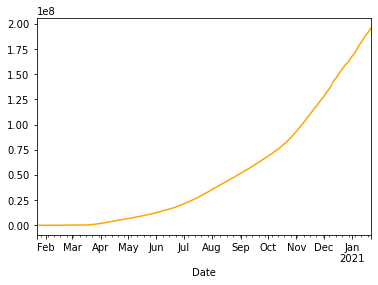

In [82]:
covid.groupby('Date').total_cases.sum().plot(color='orange')

Text(0, 0.5, 'Count')

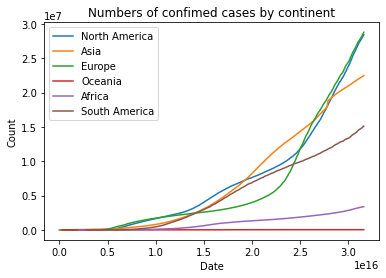

In [104]:
covid_graph1 = covid.loc[:, ['continent', 'total_cases']] #두 데이터로만 이뤄진 그래프를 만들기 쉽게 둘만으로 이루어진 DataFrame 생성
f = covid_graph1.groupby(['continent', 'ref_date']).total_cases.sum() #대륙별+날짜별로 total_cases를 합쳐 만든 시리즈 생성
ax= plt.subplot() 
continents=['North America', 'Asia', 'Europe', 'Oceania', 'Africa',
       'South America']
for cont in continents:
    ax.plot(f.loc[cont], label=cont)
    ax.legend(loc='upper left') #범례의 위치를 지정해주는 파라미터 loc에 upper left라고 위치 선정해줌.
ax.set_title('Numbers of confimed cases by continent')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

In [97]:
covid_latest = covid.loc['366days']

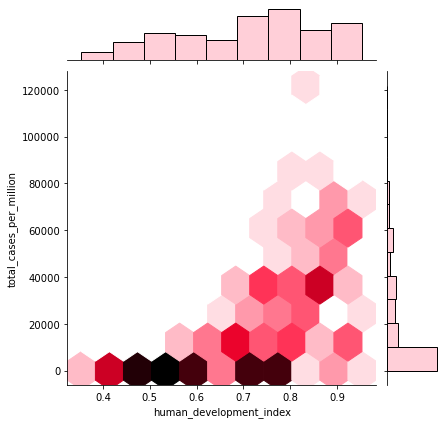

In [15]:
ax2 = sns.jointplot(x=covid_latest['human_development_index'],y=covid_latest['total_cases_per_million'], color= 'pink', kind ='hex')

## 65세 이상 인구 비율과 백만명 당 확진자 수는 비례할까?

In [13]:
covid.aged_65_older.count() #누락값이 아닌 값 개수 확인

57996

In [30]:
covid_aged_cases = covid.loc['387 days',['iso_code', 'aged_65_older', 'total_cases_per_million']]

Text(0, 0.5, 'total_cases_per_million')

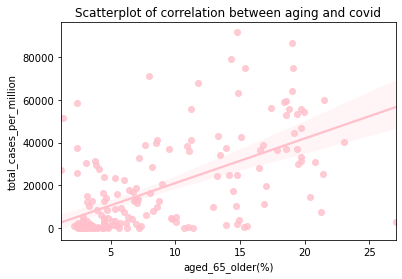

In [106]:
ax = plt.subplots()

ax = sns.regplot(x = 'aged_65_older', y = 'total_cases_per_million', data=covid_aged_cases, color = 'pink')
ax.set_title('Scatterplot of correlation between aging and covid')
ax.set_xlabel('aged_65_older(%)')
ax.set_ylabel('total_cases_per_million')

In [47]:
covid_aged_cases2  = covid_aged_cases.sort_values(by='aged_65_older', ascending=False).head(5)

         iso_code  aged_65_older  total_cases_per_million
ref_date                                                 
387 days      JPN         27.049                 2824.035
387 days      ITA         23.021                40386.705
387 days      PRT         21.502                59738.502
387 days      DEU         21.453                25365.970
387 days      FIN         21.228                 7564.904



(0.0, 12800.0)

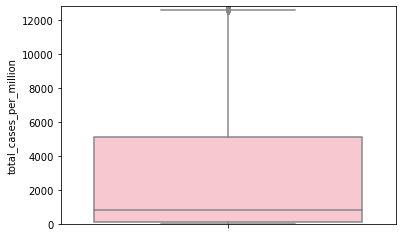

In [121]:
print(covid_aged_cases2)
print()
ax5 = plt.subplot()
ax5 = sns.boxplot(y='total_cases_per_million', data=covid, color='pink')
plt.ylim(0,12800)

#65세 이상 인구 비율이 가장 높은 5개 국가는 모두 중위값을 한참 상회하는 확진자 비율을 갖고 있음.

         iso_code  aged_65_older  total_cases_per_million
ref_date                                                 
387 days      AND            NaN               121866.304
387 days      MNE         14.762                91522.811
387 days      CZE         19.027                86361.804
387 days      SMR            NaN                84300.784
387 days      LUX         14.312                78977.469


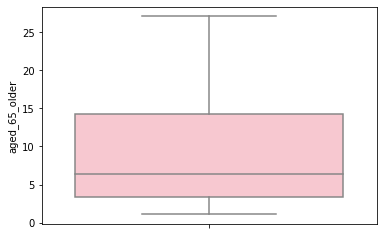

In [123]:
covid_aged_cases3 = covid_aged_cases.sort_values(by='total_cases_per_million', ascending=False).head(5)
print(covid_aged_cases3)

ax3 = plt.subplot()
ax3 = sns.boxplot(y='aged_65_older', data=covid, color='pink')

#확진자 비율이 가장 높은 다섯 국가는 중위값을 한참 상회하는 65세 이상 인구 비율을 갖고 있음.

In [142]:
print('국가별 65세 이상 인구수와 확진자 비율의 상관관계는 {}입니다.'.format(round(covid_aged_cases.corr().iloc[0,1],2)))
#꽤 높은 상관관계를 가지고 있음. (상관계수 0.60)

국가별 65세 이상 인구수와 확진자 비율의 상관관계는 0.6입니다.


## 보너스

<AxesSubplot:>

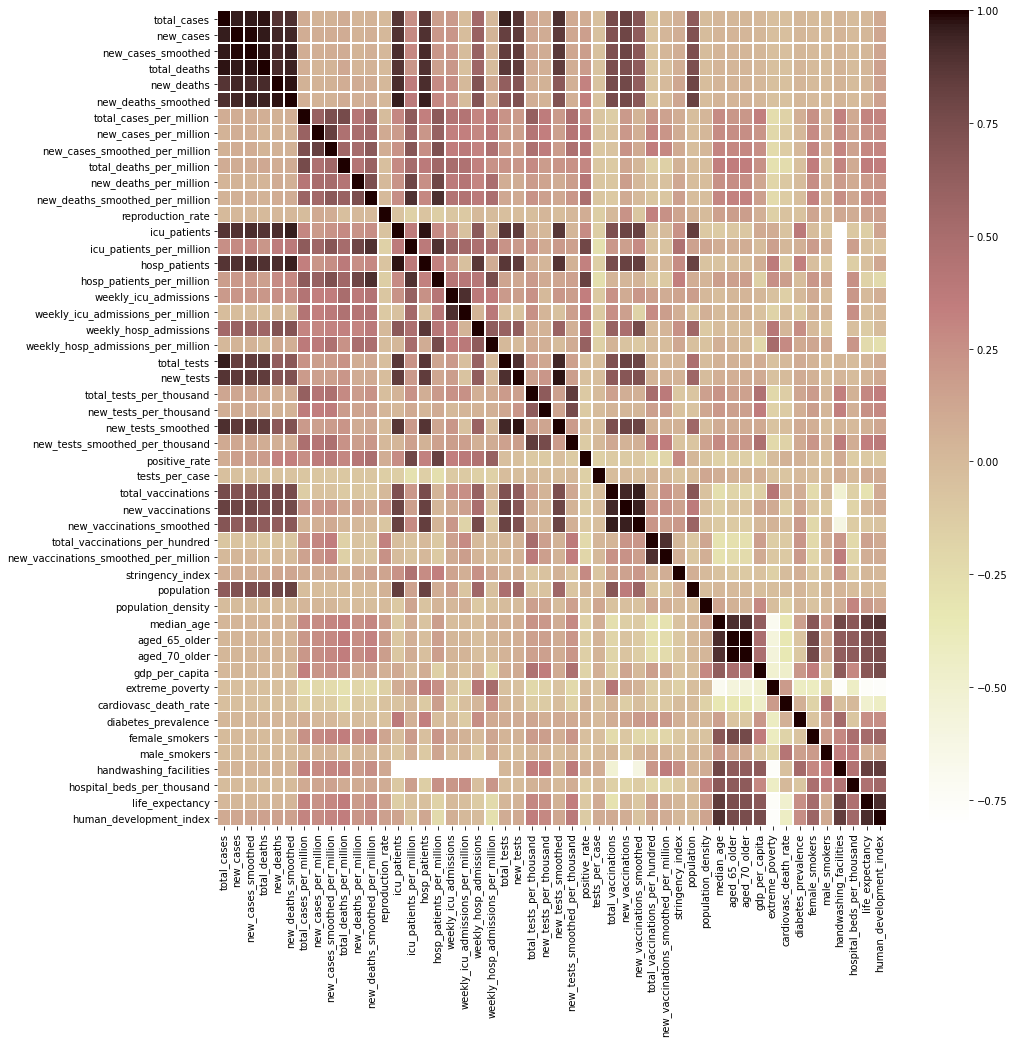

In [107]:
plt.figure(figsize=(15,15))
sns.heatmap(data = covid.corr(), linewidths=.5, cmap = 'pink_r') #아예 희거나 아예 검을수록 상관관계가 크다. 